In [ ]:
#biblioteki i funkcje
SEED_NUM=0
import os 
os.environ['PYTHONHASHSEED']=str(SEED_NUM)


import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import winsound
from tensorflow  import random as rnd


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM, Input
from keras.activations import relu, elu, sigmoid
from keras.optimizers import Adam, Nadam, RMSprop, Adagrad, Adadelta, SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping


from keras import Input


import datetime as dt 


def write(frame,name):
    writer=pd.ExcelWriter(name+'.xlsx')
    frame.to_excel(writer)
    writer.close()
    
def reset_random_seeds():
    os.environ['PYTHONHASHSEED']=str(SEED_NUM)
    rnd.set_seed(SEED_NUM)
    np.random.seed(SEED_NUM)
    random.seed(SEED_NUM)

def plot_learn(learn_hist):
    plt.plot(learn_hist.history['loss'])
    plt.plot(learn_hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()



In [2]:
#wczytywanie przykładowej ramki danych
data=pd.read_excel('df_ex.xlsx')

#Nomalizacja zmiennych
data['A']=data['A']/100
data['B']=data['B']/100
data['Res']=data['Res']/10000

#podział danych na treningowe/walidaycjne/testowe
df_tr_in=data.loc[0:74,['A','B']]
df_val_in=data.loc[75:100,['A','B']]
df_test_in=data.loc[101:200,['A','B']]

df_tr_out=data.loc[0:74,'Res']
df_val_out=data.loc[75:100,'Res']
df_test_out=data.loc[101:200,'Res']

#przeformatowanie danych na postać macierzy 3D do lstm
tr_samples_num=len(df_tr_in)
in_tr=df_tr_in.values.reshape(tr_samples_num,1,len(df_tr_in.columns)) #najpierw liczba próbek, potem liczba wierszy, potem kolumn
out_tr=df_tr_out.values.reshape(tr_samples_num,1,1)

val_samples_num=len(df_val_in)
in_val=df_val_in.values.reshape(val_samples_num,1,len(df_val_in.columns)) #najpierw liczba próbek, potem liczba wierszy, potem kolumn
out_val=df_val_out.values.reshape(val_samples_num,1,1)

test_samples_num=len(df_test_in)
in_test=df_test_in.values.reshape(test_samples_num,1,len(df_test_in.columns)) #najpierw liczba próbek, potem liczba wierszy, potem kolumn
out_test=df_test_out.values.reshape(test_samples_num,1,1)

In [3]:
np.shape(in_tr)

(75, 1, 2)

In [4]:
#in_tr

In [5]:
#out_tr

In [6]:
data

,A,B,Res
0,0.90,0.49,0.4410
1,0.09,0.90,0.0810
2,0.59,0.73,0.4307
3,0.35,0.74,0.2590
4,0.75,0.08,0.0600
...,...,...,...
195,0.30,0.38,0.1140
196,0.90,0.88,0.7920
197,0.11,0.11,0.0121
198,0.05,0.56,0.0280


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2543 - val_loss: 0.2708
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2525 - val_loss: 0.2688
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2507 - val_loss: 0.2667
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2490 - val_loss: 0.2646
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2472 - val_loss: 0.2625
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2455 - val_loss: 0.2605
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2439 - val_loss: 0.2584
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2422 - val_loss: 0.2564
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2405 - val_loss: 0.2545
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2389 - val_loss: 0.2526
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2373 - val_loss: 0.2506
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2357 - val_loss

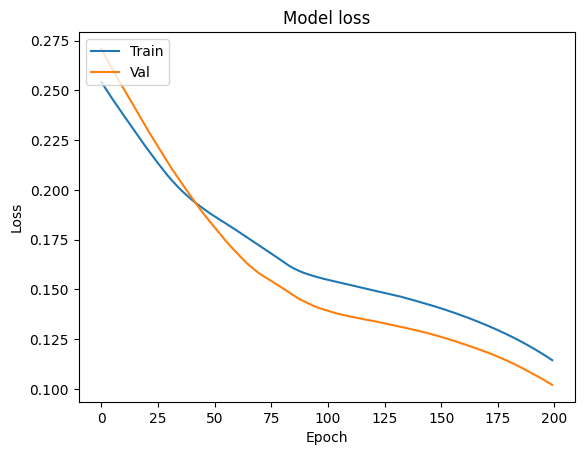

<Axes: title={'center': 'Prognoza na danych testowych'}>

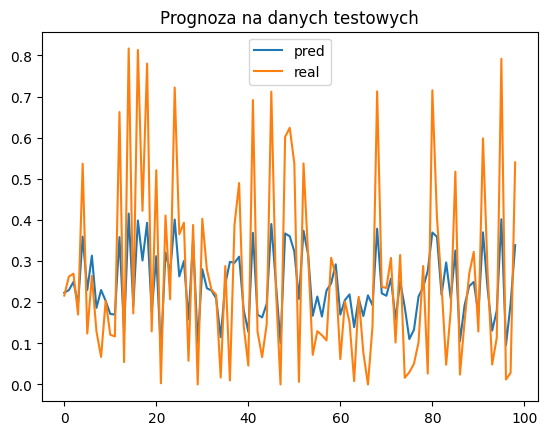

In [ ]:
# manualne lstm

#model

reset_random_seeds()

######## wybór struktury modelu
model = Sequential()
model.add(Input(shape=(in_tr.shape[1],in_tr.shape[2])))
model.add(LSTM(8,return_sequences=True,activation='tanh'))
#model.add(Dense(8,input_shape=(in_tr.shape[1],in_tr.shape[2]),activation='tanh'))
#model.add(LSTM(8,return_sequences=True, activation='tanh'))
#model.add(Dropout(0.8))
#model.add(Dense(10, activation='relu'))
model.add(LSTM(4,return_sequences=True,activation='tanh'))
#model.add(LSTM(3,return_sequences=True,activation='sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))


######## wybór optymalizatora

opt= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, weight_decay=0.0001, amsgrad=True)
#opt = SGD(learning_rate=0.001, clipvalue=0.5, nesterov=True, momentum=0.8)
#opt = Adagrad(learning_rate=0.01, epsilon=1e-6, weight_decay=0.0)
#opt = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-6)
#opt =Adadelta(learning_rate=1.0, rho=0.95, weight_decay=0.0)
#opt= Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

######### kompilacja modelu
model.compile(loss='mae',optimizer=opt)

######## wybór liczby epok i buforu wczesnego uczenia
pat=20
epo=200

early_stopping =EarlyStopping(monitor='val_loss', patience=pat)

######## nauczenie modelu danymi, generacja prognozy na danych testowych

#instrukja uczenia modelu
history=model.fit(in_tr, out_tr,validation_data=(in_val,out_val),epochs=epo,batch_size=128,verbose=1,shuffle=True,callbacks=[early_stopping]) 
#instrukja walidacji modelu
score = model.evaluate(in_test, out_test, batch_size=128) #instrukcja testowania modelu

ucz=history.history['loss'][-1]
spr=history.history['val_loss'][-1]
prognosis=model.predict(in_test, batch_size=None, verbose=0, steps=None) # pozyskanie szeregu czasowego prognoz (wartośći)

# wyniki

print('NMAE[%]:  tren: {:.2f}, val: {:.2f}, test {:.2f}'.format(ucz*100, spr*100, score*100))

df_comp_test = pd.DataFrame(data=zip(prognosis.flatten().tolist(), out_test.flatten().tolist()), columns=['pred', 'real'])
write(df_comp_test ,'prognoza_iter')

plot_learn(history)

# prosty wykres prognozy

df_comp_test.plot(title ='Prognoza na danych testowych')